In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data_x = [[3.333,2.313],
             [3.111,1.781],
             [1.343,3.368],
             [3.582,4.679],
             [2.280,2.866],
             [7.423,4.696],
             [5.745,3.533],
             [9.172,2.511],
             [7.792,3.424],
             [7.939,0.791]]
raw_data_y = [0,0,0,0,0,1,1,1,1,1]

X_train = np.array(raw_data_x)
y_train = np.array(raw_data_y)

In [3]:
x = np.array([8.093,3.365])

In [4]:
%run ML_learning/KNN_algorithm.py

ValueError: Expected 2D array, got 1D array instead:
array=[8.093 3.365].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [5]:
predict_y = KNN_classify(6,X_train,y_train,x)

In [6]:
predict_y

1

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [8]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [9]:
from ML_learning.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [11]:
print(x_test.shape)
print(y_test.shape)

(30, 4)
(30,)


In [12]:
from ML_learning.KNN import KNNClassifier

In [13]:
my_knn_clf = KNNClassifier(k=5)

In [14]:
my_knn_clf.fit(x_train,y_train)

KNN(k =5)

In [15]:
y_predict = my_knn_clf.predict(x_test)

In [16]:
y_predict

array([0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1,
       2, 1, 1, 0, 0, 0, 0, 2])

In [17]:
"""
将结果与y_test进行比较就可以得到准确率
"""
y_test

array([0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1,
       2, 1, 1, 0, 0, 0, 0, 2])

In [18]:
sum(y_predict == y_test)
"""
有28个元素相同 预测成功
"""

'\n有28个元素相同 预测成功\n'

In [19]:
sum(y_predict == y_test) / len(y_test)

1.0

### sklearn中的train_test_split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [22]:
print(x_test.shape)
print(y_test.shape)

(30, 4)
(30,)


In [23]:
print(x_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [24]:
"""
需要复现 加上随机种子
random_state
"""
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=666)

### 4.4分类准确度accuracy

In [25]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [26]:
digits = datasets.load_digits()

In [27]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [28]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [29]:
x = digits.data
x.shape

(1797, 64)

In [30]:
y = digits.target

In [31]:
y.shape

(1797,)

In [32]:
digits.target_names#具体什么

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
y[:150]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5,
       4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
x[:10]#取x的前10行 每一行有64个数据

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [35]:
some_digit = x[666]

In [36]:
y[666]

0

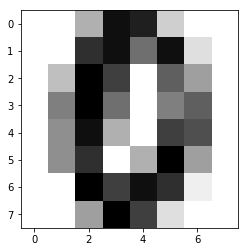

In [37]:
some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary)
plt.show()

In [38]:
from ML_learning.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_ratio=0.3)

In [40]:
from ML_learning.KNN import KNNClassifier

In [41]:
my_knn_clf = KNNClassifier(k = 5)

In [42]:
my_knn_clf.fit(x_train,y_train)

KNN(k =5)

In [43]:
y_predict = my_knn_clf.predict(x_test)

In [44]:
y_predict

array([5, 4, 9, 4, 1, 3, 9, 5, 7, 5, 3, 4, 5, 2, 5, 7, 5, 5, 1, 6, 6, 8,
       9, 0, 3, 9, 2, 8, 1, 1, 2, 5, 4, 7, 7, 8, 3, 3, 6, 4, 0, 6, 5, 0,
       4, 7, 3, 4, 8, 8, 2, 6, 1, 3, 0, 2, 6, 3, 0, 5, 7, 2, 7, 5, 0, 9,
       0, 8, 8, 6, 5, 4, 4, 6, 2, 9, 6, 0, 2, 0, 8, 2, 9, 7, 5, 4, 3, 8,
       5, 5, 8, 3, 4, 3, 8, 7, 4, 1, 1, 8, 3, 2, 3, 0, 3, 0, 2, 3, 9, 5,
       6, 8, 6, 5, 3, 2, 7, 1, 2, 7, 5, 0, 6, 2, 8, 1, 0, 0, 1, 0, 5, 9,
       8, 1, 8, 9, 9, 3, 7, 9, 3, 4, 8, 5, 1, 8, 5, 8, 4, 9, 6, 6, 7, 0,
       5, 1, 8, 5, 5, 5, 2, 5, 9, 2, 1, 1, 8, 5, 6, 3, 3, 6, 6, 0, 9, 9,
       5, 2, 9, 3, 6, 1, 8, 4, 0, 0, 5, 9, 6, 7, 4, 6, 1, 9, 4, 7, 0, 8,
       3, 3, 4, 7, 7, 4, 4, 4, 8, 5, 0, 2, 0, 3, 2, 0, 9, 7, 3, 2, 0, 3,
       6, 3, 3, 8, 4, 8, 2, 4, 3, 7, 2, 9, 2, 7, 7, 3, 2, 2, 6, 5, 8, 2,
       2, 5, 5, 9, 6, 2, 4, 9, 8, 5, 6, 5, 1, 4, 8, 0, 6, 2, 7, 3, 4, 3,
       6, 5, 0, 8, 2, 7, 7, 5, 1, 1, 7, 3, 4, 3, 0, 1, 4, 4, 9, 9, 7, 5,
       3, 0, 7, 8, 6, 7, 0, 2, 7, 7, 0, 4, 3, 1, 5,

In [45]:
sum(y_predict == y_test) / len(y_test)

0.987012987012987

In [46]:
from ML_learning.metrics import accuracy_score

In [47]:
accuracy_score(y_test,y_predict)

0.987012987012987

#### 不需要求出预测值 只要求预测度 在KNN封装一个函数即可
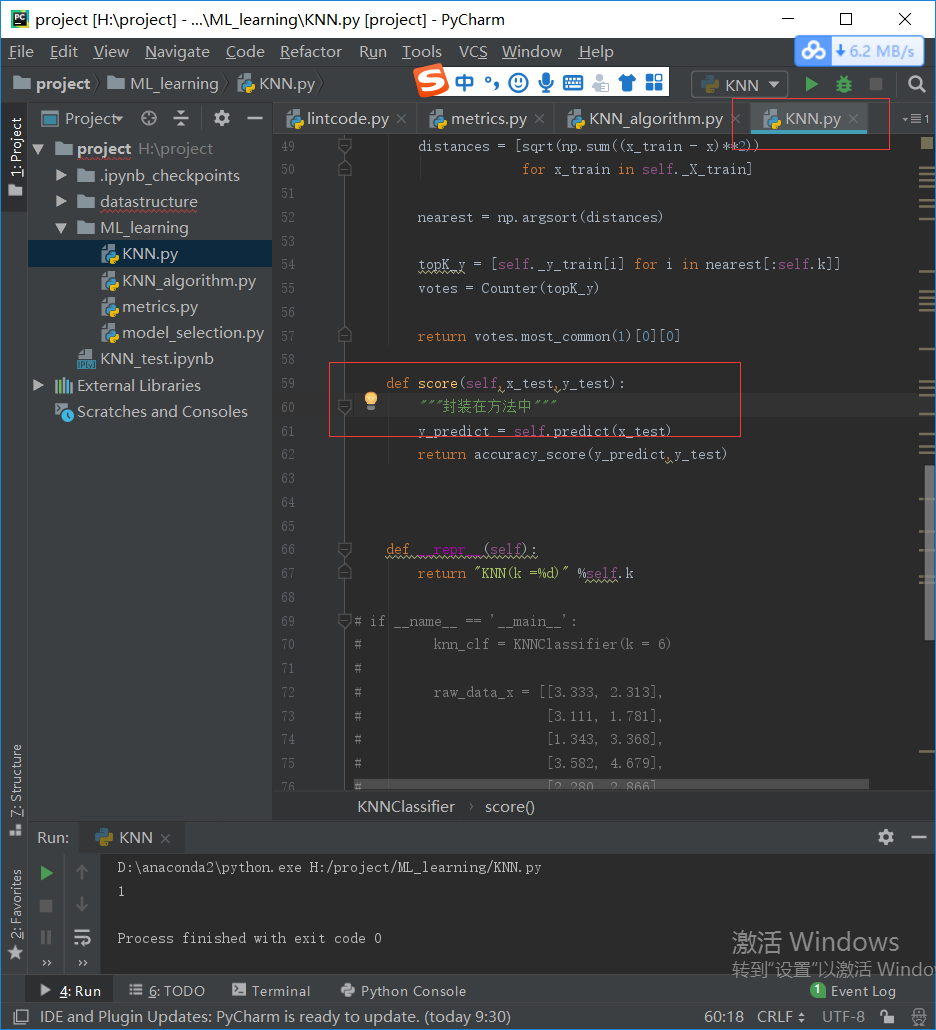

In [48]:
my_knn_clf.score(x_test,y_test)

0.987012987012987

### scikit-learn中的accuracy_score

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=655)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 4)

In [52]:
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [53]:
y_predict = knn_clf.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.9822222222222222

In [55]:
knn_clf.score(x_test,y_test)

0.9822222222222222

### 超参数
- KNN算法中的k是典型的值

#### 超参数和模型参数
- 超参数:在算法运行前需要决定的参数(knn的k)
- 模型参数:算法过程中学习的参数

- KNN算法没有模型参数
- kNN算法中的k是典型的超参数

#### 寻找的超参数
- 领域知识
- 经验数值
- 实验搜索（尝试测试不同的值 最后选择最好的k）

### 寻找最好的k
- 若最好值在边界上 还需要拓展搜索范围

In [56]:
best_score = 0.0
besk_k = -1
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(x_train,y_train)
    score=knn_clf.score(x_test,y_test)
    if score > best_score:
        best_k = k
        best_score = score
print("best_k = ",best_k)
print("best_score =",best_score)
    

best_k =  5
best_score = 0.9866666666666667


### kNN算法
- 考虑距离权重 距离的倒数
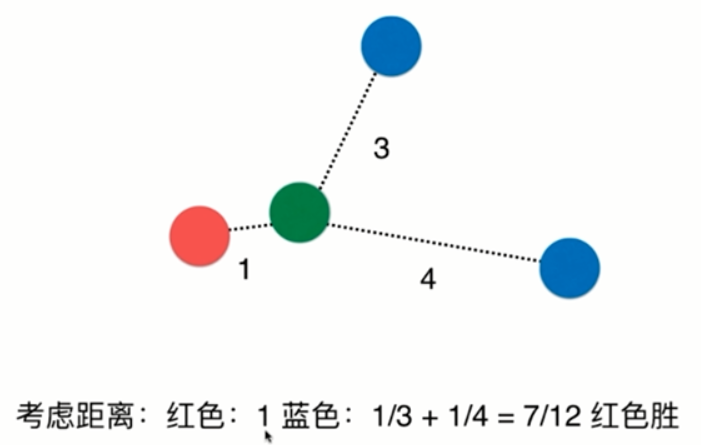

- 如果出现三个值了 可以解决平票问题
- 官网有指示 n_neighbors有weights:default is uniform
- if choose distance the result will be distance
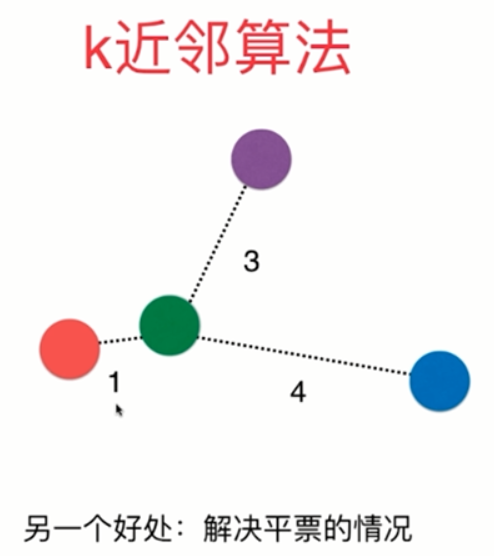

### 考虑距离?不考虑距离?

In [57]:
best_method = " "
best_score = 0.0
besk_k = -1
for method in ["uniform","distance"]:
  for k in range(1,11):
      knn_clf = KNeighborsClassifier(n_neighbors=k,weights=method)
      knn_clf.fit(x_train,y_train)
      score=knn_clf.score(x_test,y_test)
      if score > best_score:
          best_k = k
          best_score = score
          best_method = method
print("best_method",best_method)
print("best_k = ",best_k)
print("best_score =",best_score)
    

best_method uniform
best_k =  5
best_score = 0.9866666666666667


### 更多关于距离的问题
- 欧拉距离(平时):
$\sqrt{\sum_{i=1}^{n}(X_{i}^{(a)} - X_{i}^{(b)})^{2}}$
- 曼哈顿距离:指的是在各个维度距离差之和
$\sum_{i=1}^{n}|X_{i}^{(a)} - X_{i}^{(b)}|$

- 距离的改变形式
- 曼哈顿距离
$(\sum_{i=1}^{n}|X_{i}^{(a)} - X_{i}^{(b)}|)^{\frac{1}{1}}$
- 欧拉距离
$(\sum_{i=1}^{n}|X_{i}^{(a)} - X_{i}^{(b)}|^{2})^{\frac{1}{2}}$
- 明科夫斯基距离 Minkowski Distance
$(\sum_{i=1}^{n}|X_{i}^{(a)} - X_{i}^{(b)}|^{p})^{\frac{1}{p}}$
- 获得超参数p

### 搜索明科夫斯基距离相应的p

In [58]:
%%time
bset_p = -1
best_method = " "
best_score = 0.0
besk_k = -1
for method in ["uniform","distance"]:
  for k in range(1,11):
    for p in range(1,6):
      knn_clf = KNeighborsClassifier(n_neighbors=k,weights=method,p=p)
      knn_clf.fit(x_train,y_train)
      score=knn_clf.score(x_test,y_test)
      if score > best_score:
          best_k = k
          best_p = p
          best_score = score
          best_method = method
print("best_p =",best_p)
print("best_method=",best_method)
print("best_k = ",best_k)
print("best_score =",best_score)
    

best_p = 3
best_method= uniform
best_k =  3
best_score = 0.9888888888888889
CPU times: user 32 s, sys: 26.3 ms, total: 32.1 s
Wall time: 32.1 s


### 4.6网格搜索 Grid Search

In [59]:
param_grid =[ 
    {
         'weights' : ['uniform'],
         'n_neighbors':[i for i in range(1,11)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[ i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    }
]
###注意是[]

In [60]:
knn_clf = KNeighborsClassifier()

In [61]:
from sklearn.model_selection import GridSearchCV
###搜索gridsearchcv  在sklearn中的ms中

In [62]:
%%time
grid_search = GridSearchCV(knn_clf,param_grid)

grid_search.fit(x_train,y_train)

/Users/ccai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 1min 45s, sys: 541 ms, total: 1min 45s
Wall time: 1min 47s


In [63]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [64]:
grid_search.best_score_

0.985894580549369

In [65]:
grid_search.best_params_#对应的参数最优结果

{'n_neighbors': 1, 'weights': 'uniform'}

In [66]:
knn_clf = grid_search.best_estimator_

In [67]:
knn_clf.score(x_test,y_test)

0.98

###  gridsearchcv还有其他参数

#### n_jobs 并行处理的个数

#### verbose：输出对应的搜索信息 越大越详细

In [68]:
grid_search = GridSearchCV(knn_clf,param_grid,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/ccai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   48.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

### 更多的距离定义

- 向量空间余弦相似度 Cosine Similarity
- 调整余弦相似度 Adjusted Cosine Similarity
- 皮尔森相关系数 Pearson Correlation Coefficient
- Jaccard相似系数 Jaccard Coefficient

- metrics有默认参数 明可夫斯基

## 4.7 数据归一化 Feature Scaling
### 样本间的距离被发现时间所主导
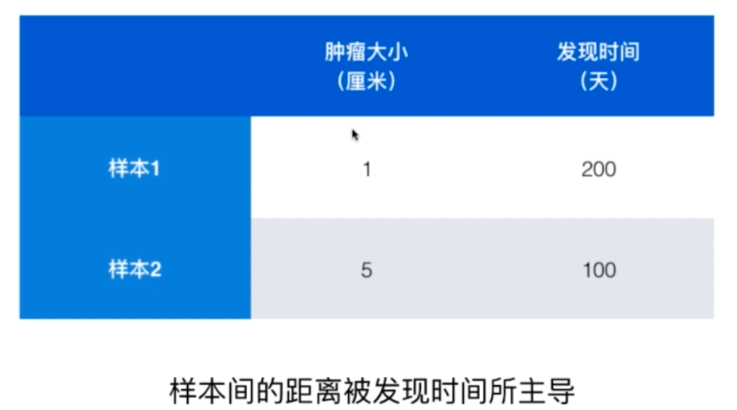

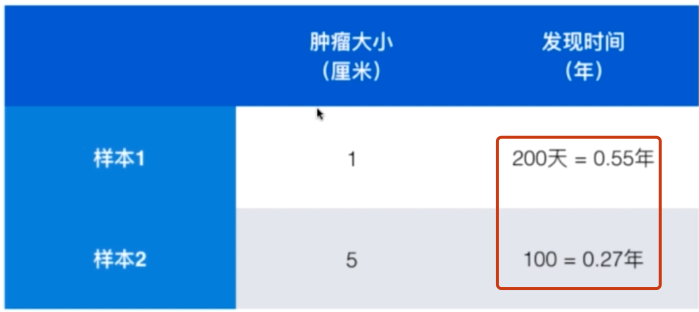

解决方案：将所有的数据映射到同意尺度

#### 最终归一化：把所有数据映射到0-1之间
- 学生分数 像素
- (normalization) 适用于分布有明显边界的情况;受outlier影响较大
- 收入是差不多位置的
- $x_{scale} = \frac{x-x_{min}}{x_{max} - x_{min}}$

#### 均值方差归一化 standardization
- 数据分布没有明显的边界 可能存在极端数据值
- 均值方差归一化：把所有数据归一化到均值为0方差为1的分布中
- $x_{scale} = \frac{x- x_{mean}}{s}$


### 最终归一化 Normalization

In [69]:
x = np.random.randint(0,100,size = 100)

In [70]:
x

array([73, 30, 35, 90, 72, 17, 88, 45,  4, 62, 67, 31, 97, 28, 86, 80, 12,
       98,  2, 16, 46, 79, 75, 98, 66, 13, 32, 10, 50, 65, 22, 89, 28, 92,
       32, 55,  4, 16, 47, 69, 59, 94, 44, 40, 65, 49, 22, 10, 46, 31, 86,
       88, 83, 12, 48, 45, 67, 11, 22, 11, 81, 14, 94, 89, 43, 30,  7, 10,
       22, 25, 33, 24, 65, 37, 78, 38, 50, 49, 53,  0, 83, 16, 19, 81, 55,
       27, 64, 47, 41, 29, 45,  1, 37, 27, 37, 57, 43, 78, 59,  1])

In [71]:
(x - np.min(x))/(np.max(x) - np.min(x))

array([0.74489796, 0.30612245, 0.35714286, 0.91836735, 0.73469388,
       0.17346939, 0.89795918, 0.45918367, 0.04081633, 0.63265306,
       0.68367347, 0.31632653, 0.98979592, 0.28571429, 0.87755102,
       0.81632653, 0.12244898, 1.        , 0.02040816, 0.16326531,
       0.46938776, 0.80612245, 0.76530612, 1.        , 0.67346939,
       0.13265306, 0.32653061, 0.10204082, 0.51020408, 0.66326531,
       0.2244898 , 0.90816327, 0.28571429, 0.93877551, 0.32653061,
       0.56122449, 0.04081633, 0.16326531, 0.47959184, 0.70408163,
       0.60204082, 0.95918367, 0.44897959, 0.40816327, 0.66326531,
       0.5       , 0.2244898 , 0.10204082, 0.46938776, 0.31632653,
       0.87755102, 0.89795918, 0.84693878, 0.12244898, 0.48979592,
       0.45918367, 0.68367347, 0.1122449 , 0.2244898 , 0.1122449 ,
       0.82653061, 0.14285714, 0.95918367, 0.90816327, 0.43877551,
       0.30612245, 0.07142857, 0.10204082, 0.2244898 , 0.25510204,
       0.33673469, 0.24489796, 0.66326531, 0.37755102, 0.79591

In [72]:
X = np.random.randint(0,100,(50,2))
#[50 , 20]

In [73]:
X[:10,]
# get top 10 number

array([[39, 10],
       [ 9, 92],
       [42,  8],
       [96, 42],
       [67, 74],
       [80, 12],
       [98,  0],
       [90, 49],
       [36, 36],
       [58, 22]])

In [74]:
X = np.array(X,dtype=float)
X[:10,:]

array([[39., 10.],
       [ 9., 92.],
       [42.,  8.],
       [96., 42.],
       [67., 74.],
       [80., 12.],
       [98.,  0.],
       [90., 49.],
       [36., 36.],
       [58., 22.]])

In [75]:
X[:,0] = (X[:,0] - np.min(X[:,0]))/(np.max(X[:,0]) - np.min(X[:,0]))

In [76]:
X[:,1] = (X[:,1] - np.min(X[:,1]))/(np.max(X[:,1]) - np.min(X[:,1]))

In [77]:
X[:10,:]

array([[0.39795918, 0.1010101 ],
       [0.09183673, 0.92929293],
       [0.42857143, 0.08080808],
       [0.97959184, 0.42424242],
       [0.68367347, 0.74747475],
       [0.81632653, 0.12121212],
       [1.        , 0.        ],
       [0.91836735, 0.49494949],
       [0.36734694, 0.36363636],
       [0.59183673, 0.22222222]])

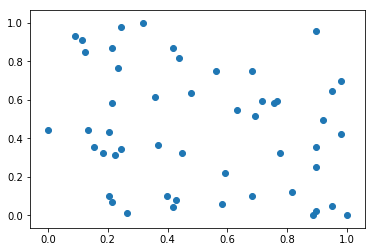

In [78]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [82]:
np.mean(X[:,0])

0.5128571428571429

In [83]:
np.std(X[:,0])

0.29954713841054437

In [84]:
np.mean(X[:,1])

0.45272727272727276

In [85]:
np.std(X[:,1])

0.3057700390888678

### 均值方差归一化 Standardization
- 将所有的均值0 方差放在1
- 即使有outliner 整体满足均值为0 方差为1

In [86]:
X2 = np.random.randint(0,100,(50,2))

In [87]:
X2 = np.array(X2,dtype=float)

In [89]:
X2[:,0] = (X2[:,0] - np.mean(X2[:,0])) / np.std(X2[:,0])

In [90]:
X2[:,1] = (X2[:,1] - np.mean(X2[:,1])) / np.std(X2[:,1])

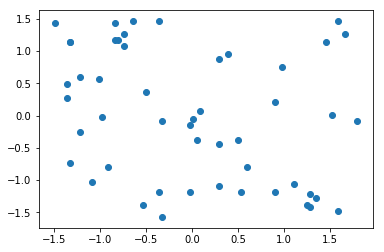

In [92]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [93]:
np.mean(X2[:,0])

-7.105427357601002e-17

In [94]:
np.std(X2[:,0])

1.0

In [95]:
np.mean(X2[:,1])

-2.220446049250313e-18

In [96]:
np.std(X2[:,1])

0.9999999999999999

### 4.8Scikit-learn中的Scaler

####  对测试数据集如何归一化
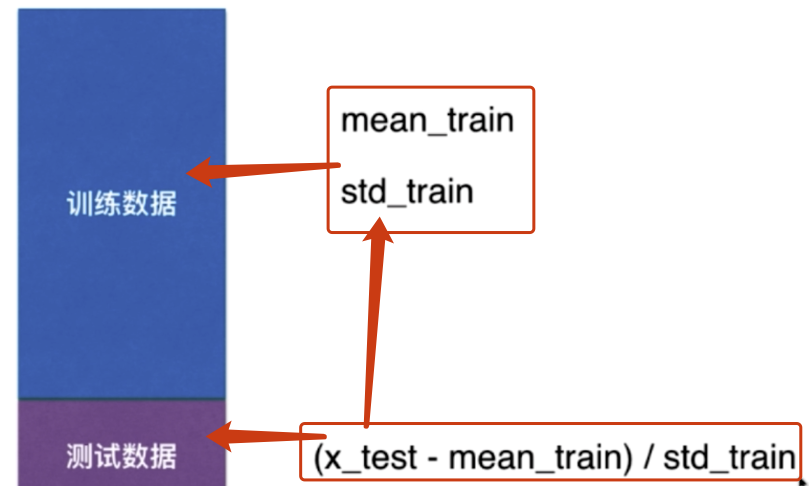

- 测试数据是模拟真实环境
  - 真实环境很有可能无法得到所有测试数据的均值和方差
  - 对数据的归一化也是算法的一部分
- 需要保存训练数据集得到的均值和方差  使用scikit-learn中的Scaler

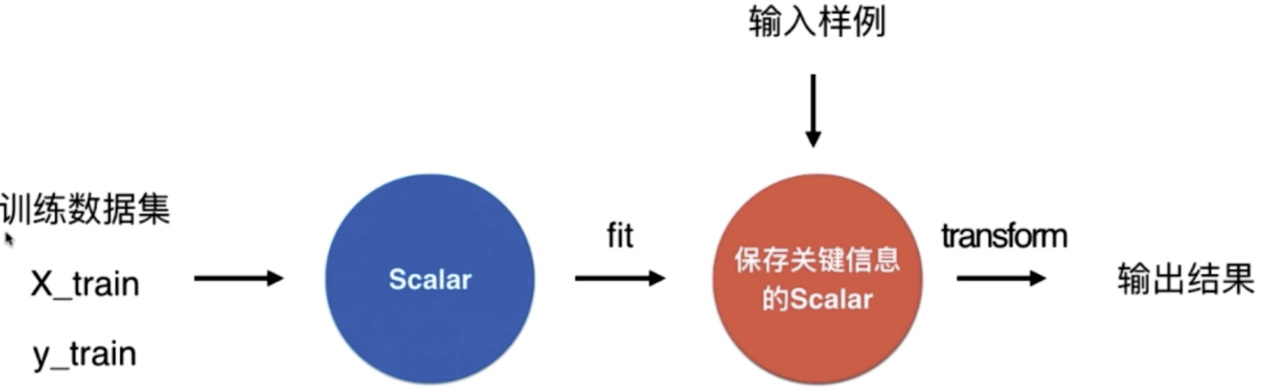

In [98]:
import numpy as np
from sklearn import datasets

In [99]:
iris = datasets.load_iris()

In [100]:
x = iris.data
y = iris.target

In [101]:
x[:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [102]:
#进行均一化处理
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.22,random_state=123)

### scikit-learn中的StandardScaler

In [103]:
from sklearn.preprocessing import StandardScaler

In [118]:
standardscaler = StandardScaler()

In [119]:
standardscaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [120]:
standardscaler.mean_#由用户输入计算得到的值

array([-6.15082534e-15,  1.39299778e-15,  1.36642834e-16, -1.57518822e-16])

In [121]:
standardscaler.scale_###统计量 

array([1., 1., 1., 1.])

In [122]:
standardscaler.transform(x_train)

array([[-0.95602855,  1.03386415, -1.40534757, -1.38756792],
       [ 0.16877375, -1.94436951,  0.11063374, -0.30436227],
       [-1.08100658, -1.71527462, -0.29751507, -0.30436227],
       [ 2.54335639,  1.72114885,  1.51000111,  1.04964479],
       [-0.58109445,  1.95024374, -1.23042665, -1.11676651],
       [-0.58109445,  1.95024374, -1.46365454, -1.11676651],
       [-0.08118231, -0.79889503,  0.05232677, -0.03356086],
       [-1.08100658, -2.40255931, -0.18090112, -0.30436227],
       [-1.08100658,  0.34657946, -1.52196152, -1.38756792],
       [ 1.16859802,  0.34657946,  1.21846624,  1.45584691],
       [ 1.04361999, -0.11161033,  0.81031743,  1.45584691],
       [-0.08118231, -0.79889503,  0.75201045,  0.91424408],
       [-0.08118231, -0.56980013,  0.75201045,  1.59124761],
       [ 0.54370785,  0.80476926,  1.04354532,  1.59124761],
       [-0.45611641, -1.71527462,  0.11063374,  0.10183985],
       [-0.95602855,  1.72114885, -1.34704059, -1.25216721],
       [-1.83087478, -0.

In [123]:
x_train = standardscaler.transform(x_train)

In [124]:
x_test_standard = standardscaler.transform(x_test)

In [126]:
x_test_standard

array([[ 0.54370785, -1.25708482,  0.63539651,  0.37264126],
       [ 1.16859802, -0.11161033,  0.98523835,  1.1850455 ],
       [ 0.66868589, -0.56980013,  1.04354532,  1.3204462 ],
       [-0.33113838, -0.11161033,  0.16894072,  0.10183985],
       [-1.20598461,  1.26295905, -1.40534757, -1.52296862],
       [ 0.16877375, -0.11161033,  0.57708953,  0.77884338],
       [ 0.54370785, -1.71527462,  0.34386164,  0.10183985],
       [-1.83087478,  0.34657946, -1.46365454, -1.38756792],
       [-1.83087478, -0.34070523, -1.40534757, -1.38756792],
       [-0.45611641, -1.02798992,  0.34386164, -0.03356086],
       [ 1.29357605,  0.11748456,  0.75201045,  1.45584691],
       [-0.45611641,  2.63752844, -1.40534757, -1.38756792],
       [-0.83105051, -0.79889503,  0.05232677,  0.23724055],
       [ 0.79366392, -0.11161033,  0.98523835,  0.77884338],
       [ 2.29340032, -0.11161033,  1.33508019,  1.45584691],
       [ 0.79366392, -0.11161033,  1.16015927,  1.3204462 ],
       [-0.45611641,  1.

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
knn_clf = KNeighborsClassifier(n_neighbors=4)

In [129]:
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [130]:
knn_clf.score(x_test,y_test)

0.8787878787878788

### 手动实现一个preprocess包 
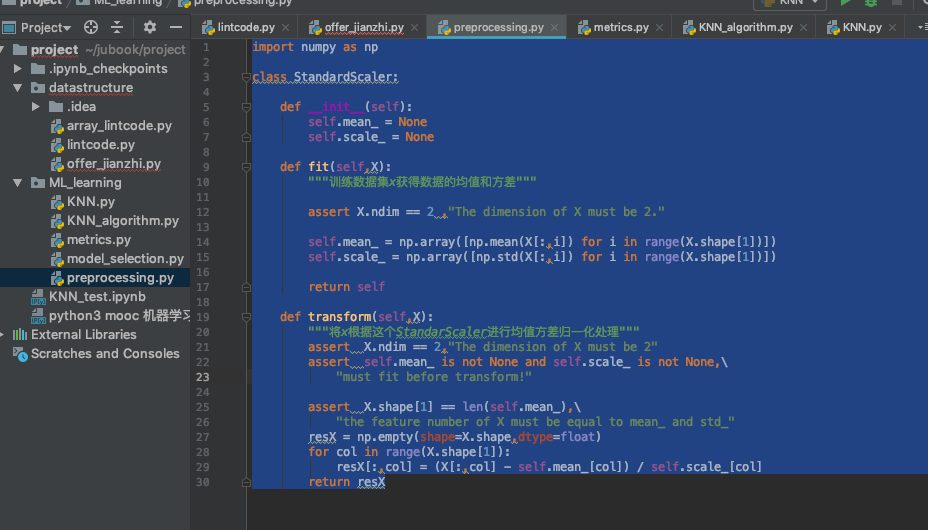

## 4.9更多有关k近邻算法

### 解决分类问题
### 天然可以解决多分类问题
### 思想简单 效果强大

### 可以解决回归问题（预测具体的数值 股票价值 学生成绩分数）
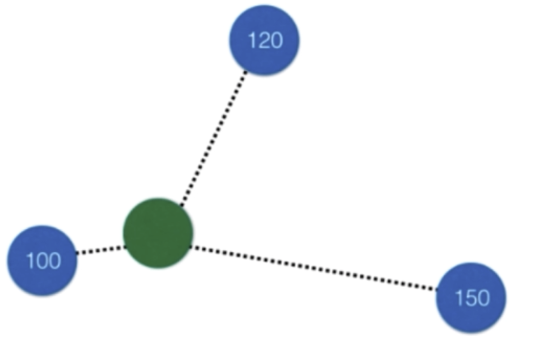
- 加权平均

### 缺点：效率低下
- 如果训练集有m个样本 n个特征 则预测每一个新的数据 需要O(m * n)
- 优化，使用树结构：KD-Tree Ball-Tree

### 缺点2:高度数据相关 就是使用高度数据相关 对outliner比较敏感 可以让数据变错误

### 缺点3:预测结果不具有可解释性

### 维数灾难：随着维数增加 看似相近的两个点之间的距离越来越大
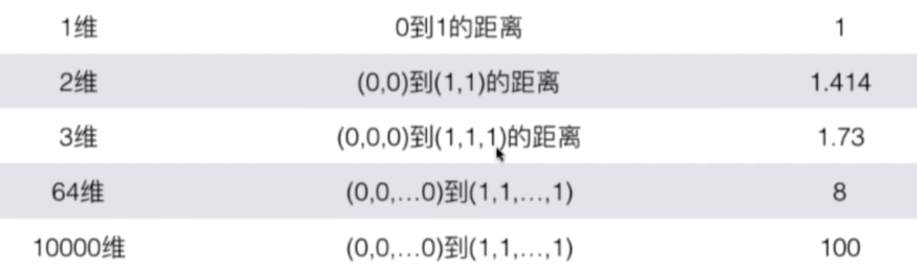
- 解决方法：降维

#### 机器学习流程回顾
- 1.将数据集分为训练数据集和测试数据集
- 2.数据归一化
- 3.训练模型
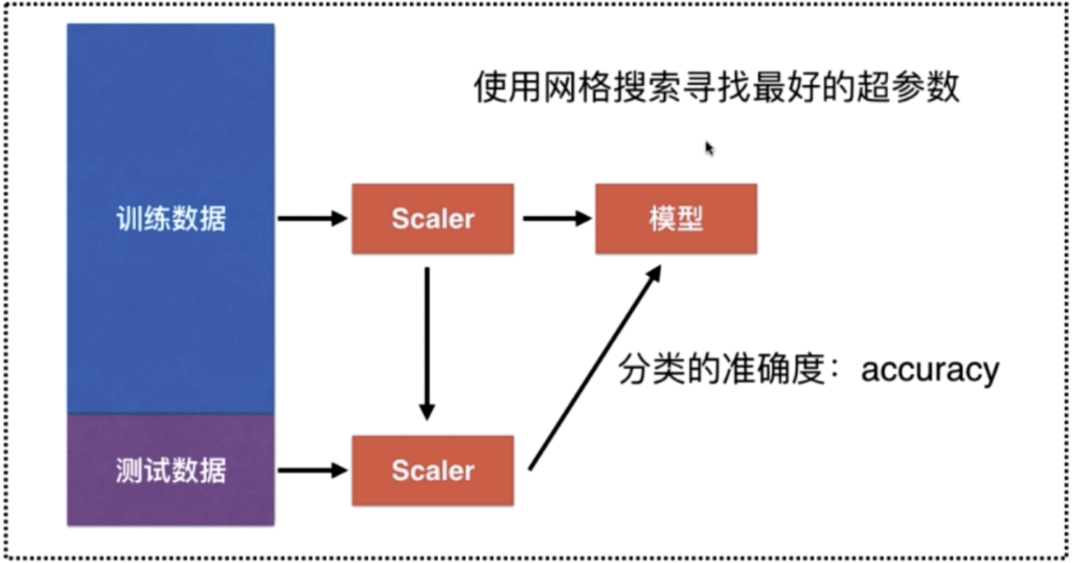